# Mask R-CNN - Train on Shapes Dataset


This notebook shows how to train Mask R-CNN on your own dataset. To keep things simple we use a synthetic dataset of shapes (squares, triangles, and circles) which enables fast training. You'd still need a GPU, though, because the network backbone is a Resnet101, which would be too slow to train on a CPU. On a GPU, you can start to get okay-ish results in a few minutes, and good results in less than an hour.

The code of the *Shapes* dataset is included below. It generates images on the fly, so it doesn't require downloading any data. And it can generate images of any size, so we pick a small image size to train faster. 

In [4]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory of the gt
GT_DIR = os.path.join(ROOT_DIR, "data/train/gt")

# Path to the gt
GT_PATH = os.path.join(GT_DIR, "austin1.png")

## Display gt

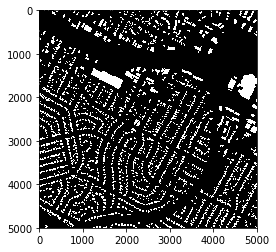

In [17]:
gt = cv2.imread(GT_PATH, 0)

plt.imshow(gt, cmap='gray')
plt.show()


In [23]:
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(gt, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

print(num_labels)
print(stats[1])

2386
[105   0  32  13 222]
